In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import time
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_excel(r"../dataset/data.xlsx",sheet_name="Sheet1")
df

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350
...,...,...,...,...,...,...,...
4021,22,66,6,6.0,50,25.00,1.628000
4022,22,66,6,6.0,75,25.00,2.714000
4023,22,66,6,6.0,100,25.00,2.879000
4024,22,66,6,7.5,0,25.00,0.602680


In [3]:
df.shape

(4026, 7)

In [4]:
df.head()

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350


In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
print(normalized_df)

      Number of Storeys(NS)  Height of Structure(HS)  Number of Spans(HSP)  \
0                       0.0                      0.0                   0.0   
1                       0.0                      0.0                   0.0   
2                       0.0                      0.0                   0.0   
3                       0.0                      0.0                   0.0   
4                       0.0                      0.0                   0.0   
...                     ...                      ...                   ...   
4021                    1.0                      1.0                   1.0   
4022                    1.0                      1.0                   1.0   
4023                    1.0                      1.0                   1.0   
4024                    1.0                      1.0                   1.0   
4025                    1.0                      1.0                   1.0   

      Length of Spans (LS)  Opening percentage (OP)  \
0       

In [6]:
normalized_df.keys()

Index(['Number of Storeys(NS)', 'Height of Structure(HS)',
       'Number of Spans(HSP)', 'Length of Spans (LS)',
       'Opening percentage (OP)', 'Masonry wall Stiffeness Et (MS)',
       'Period (P)'],
      dtype='object')

In [7]:
X=normalized_df.drop("Period (P)" ,axis=1)

In [8]:
y=normalized_df["Period (P)"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=99)

# DecisionTreeRegressor

In [10]:
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor



def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 10)
   
    
    model = DecisionTreeRegressor(max_depth=max_depth, )
    
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)
# Start time
start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
# End time
end_time = time.time()
# Calculate total time
total_time = end_time - start_time
print("Total time taken: ", total_time)
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-01-01 11:04:32,933] A new study created in memory with name: no-name-843cb930-33f2-41d5-87f4-c7af81d46eab
[I 2024-01-01 11:04:32,938] Trial 0 finished with value: 0.014199639197631902 and parameters: {'max_depth': 2}. Best is trial 0 with value: 0.014199639197631902.
[I 2024-01-01 11:04:32,943] Trial 1 finished with value: 0.00247803657218212 and parameters: {'max_depth': 5}. Best is trial 1 with value: 0.00247803657218212.
[I 2024-01-01 11:04:32,950] Trial 2 finished with value: 0.02857749901364489 and parameters: {'max_depth': 1}. Best is trial 1 with value: 0.00247803657218212.
[I 2024-01-01 11:04:32,956] Trial 3 finished with value: 0.002478036572182121 and parameters: {'max_depth': 5}. Best is trial 1 with value: 0.00247803657218212.
[I 2024-01-01 11:04:32,959] Trial 4 finished with value: 0.0012928782554585704 and parameters: {'max_depth': 6}. Best is trial 4 with value: 0.0012928782554585704.
[I 2024-01-01 11:04:32,970] Trial 5 finished with value: 0.00247803657218212 an

[I 2024-01-01 11:04:33,721] Trial 49 finished with value: 0.0002031962981810029 and parameters: {'max_depth': 10}. Best is trial 43 with value: 0.00019144643753156465.
[I 2024-01-01 11:04:33,739] Trial 50 finished with value: 0.0002616222678298409 and parameters: {'max_depth': 9}. Best is trial 43 with value: 0.00019144643753156465.
[I 2024-01-01 11:04:33,755] Trial 51 finished with value: 0.00020135794984884735 and parameters: {'max_depth': 10}. Best is trial 43 with value: 0.00019144643753156465.
[I 2024-01-01 11:04:33,776] Trial 52 finished with value: 0.00019973920582833186 and parameters: {'max_depth': 10}. Best is trial 43 with value: 0.00019144643753156465.
[I 2024-01-01 11:04:33,790] Trial 53 finished with value: 0.00020443378757387947 and parameters: {'max_depth': 10}. Best is trial 43 with value: 0.00019144643753156465.
[I 2024-01-01 11:04:33,806] Trial 54 finished with value: 0.00026271133488191267 and parameters: {'max_depth': 9}. Best is trial 43 with value: 0.000191446437

[I 2024-01-01 11:04:34,635] Trial 98 finished with value: 0.008455098971807363 and parameters: {'max_depth': 3}. Best is trial 43 with value: 0.00019144643753156465.
[I 2024-01-01 11:04:34,655] Trial 99 finished with value: 0.0002002740411431786 and parameters: {'max_depth': 10}. Best is trial 43 with value: 0.00019144643753156465.


Total time taken:  1.7220842838287354
Best trial:
  Value:  0.00019144643753156465
  Params: 
    max_depth: 10


In [10]:
from sklearn.tree import DecisionTreeRegressor
params_best['max_depth'] = int(params_best['max_depth'])
dtr_reg=DecisionTreeRegressor(**best_params)
dtr_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [11]:
y_pred= dtr_reg.predict(X_test)
y_pred1=dtr_reg.predict(X_val)
y_pred2=dtr_reg.predict(X_train)

In [12]:
print("mean_absolute_error:", mean_absolute_error(y_val, y_pred1))
print("mean_squared_error:", mean_squared_error(y_val, y_pred1))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred1)))
print("r2 score:", r2_score(y_val, y_pred1))

mean_absolute_error: 0.008569596750914198
mean_squared_error: 0.00022675810585875048
rmse: 0.015058489494592427
r2 score: 0.9954519952221524


In [13]:
print("mean_absolute_error:", mean_absolute_error(y_train, y_pred2))
print("mean_squared_error:", mean_squared_error(y_train, y_pred2))
print("rmse:", sqrt(mean_squared_error(y_train, y_pred2)))
print("r2 score:", r2_score(y_train, y_pred2))

mean_absolute_error: 0.003262241038670505
mean_squared_error: 3.738747070826177e-05
rmse: 0.006114529475622942
r2 score: 0.9992356691195386


In [14]:
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))

mean_absolute_error: 0.00827020576128103
mean_squared_error: 0.0001962175826205408
rmse: 0.014007768652449284
r2 score: 0.9961699191696043


In [16]:
from yellowbrick.regressor import PredictionError

D:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


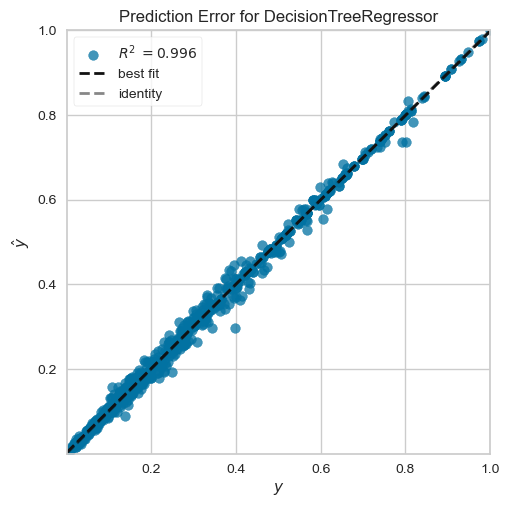

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [17]:
visualizer = PredictionError(dtr_reg)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

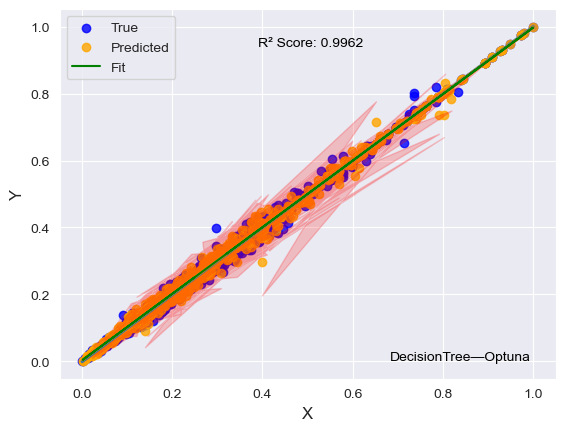

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats

r2 = r2_score(y_test, y_pred)

slope, intercept, _, _, _ = stats.linregress(y_test, y_pred)
fit_line = intercept + slope * y_test

sns.set_style('darkgrid')
sns.regplot(x=y_pred, y=y_test, label='True', scatter_kws={'color': 'blue'})
sns.regplot(x=y_test, y=y_pred, label='Predicted', scatter_kws={'color': 'orange'})
plt.plot(y_test, fit_line, label='Fit', color='green')
plt.fill_between(y_test, y_pred - (y_pred - y_test), y_pred + (y_pred - y_test), alpha=0.2, color='red')

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.text(0.95, 0.05, 'DecisionTree—Optuna', transform=plt.gca().transAxes, ha='right', color='black')
plt.text(0.4, 0.9, f'R² Score: {r2:.4f}', transform=plt.gca().transAxes, ha='left', color='black')
plt.show()